### Modelling and Analysis of Complex Networks
## Exercise 5
Name: Rukhsar Ahmed

# First of all we import our dataset using pandas library.

In [3]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import matplotlib.pyplot as plt
from random import sample, seed
import seaborn as sns
import itertools
import os
import math
from collections import defaultdict
from sklearn.cluster import KMeans
facebook_edges='414.edges'
twitter_edges='1046661.edges'

Here we can see that we have two nodes in every row and also notice that these nodes are connected by an edge. First we separate these nodes using numpy library because we have two different network so we apply this process twice.

In [4]:
facebook_network= nx.read_edgelist(facebook_edges,create_using= nx.Graph(),nodetype=int)
twitter_network = nx.read_edgelist(twitter_edges,create_using= nx.DiGraph(),nodetype=int)


In [5]:
# Basic attributes check
print("Number of nodes = {}, edges = {} in facebook graph.".format(facebook_network.number_of_nodes(), facebook_network.number_of_edges()))
print("Number of nodes = {}, edges = {} in Twitter graph.".format(twitter_network.number_of_nodes(), twitter_network.number_of_edges()))

Number of nodes = 150, edges = 1693 in facebook graph.
Number of nodes = 128, edges = 1642 in Twitter graph.


# (a) Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs induced on the chosen ten nodes.


In [6]:
def plot_graph_structure(G, id):
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("{} structure".format(id),
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    nx.draw_networkx(G, node_size=10, with_labels=False, arrowstyle='-', arrowsize=1, node_color='indigo', edge_color='slategray')
    fig.tight_layout()
    plt.savefig("{}_structure.png".format(id), transparent=False)
    return

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


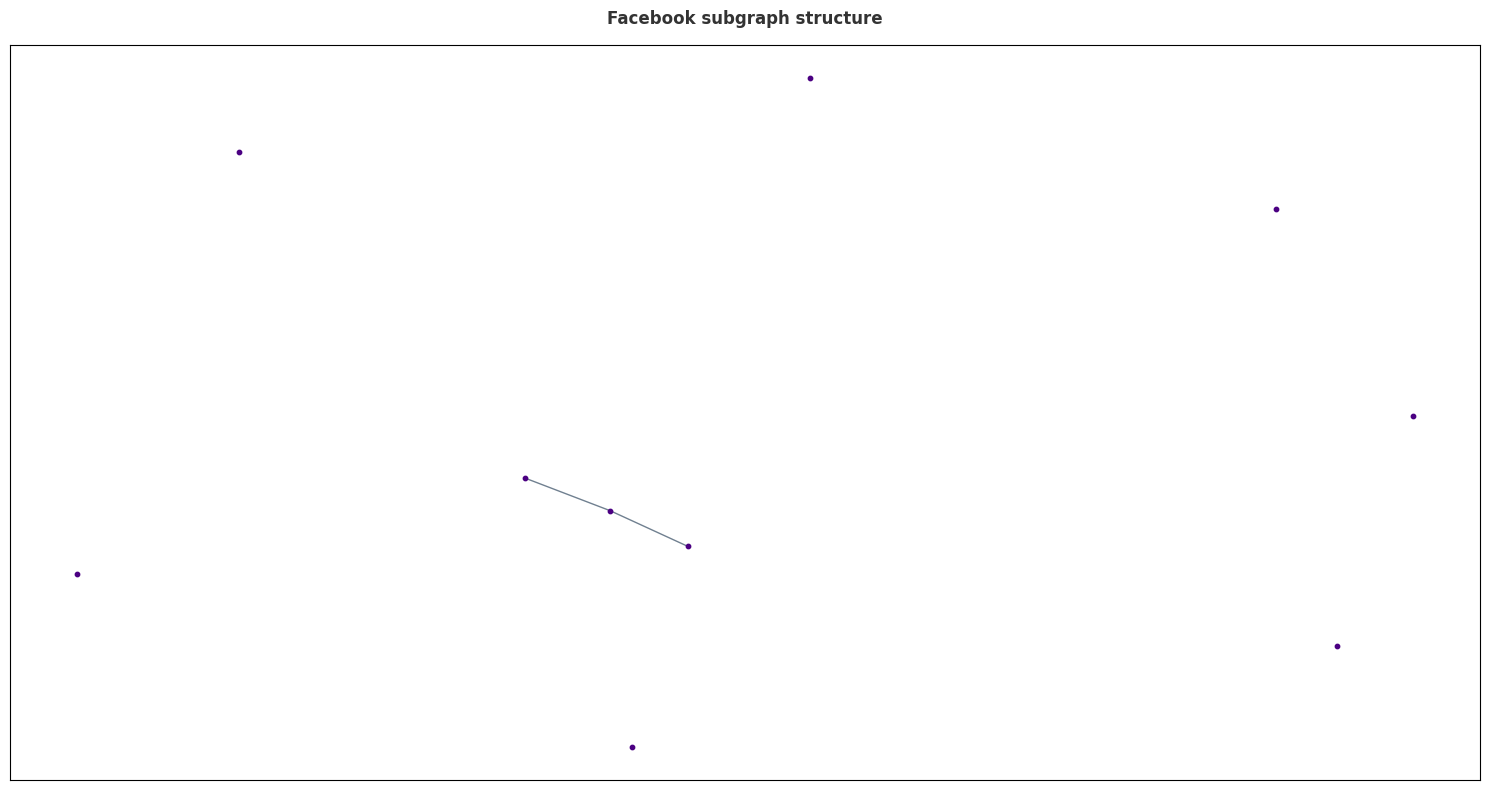

In [7]:
# Get random sample of 10 nodes
seed(560)
ten_nodes_facebook = sample(list(facebook_network.nodes()), 10)

# Create the sub graph using the select 10 nodes
subgraphFacebook = facebook_network.subgraph(ten_nodes_facebook).copy()

# Plot the largest connected component
plot_graph_structure(subgraphFacebook, 'Facebook subgraph')

# (b) Please list three algorithms for community detection.

Three algorithms for community detection are;
- Louvain algorithm
- Girvan-Newman algorithm
- Clauset-Newman-Moore community detection algorithm

# (c) Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. Please plot graphs to show the communities (mark nodes with different colors / draw communities unions....).


In [8]:
# A function to plot graphs that show communities
def plot_graph_communities(graph, communities, id):
    # Select colors to be used for the grouping
    community_colors = ["red", "orange", "yellow", "lime",
                    "royalblue", "dodgerblue", "black", "violet"
                    , "deeppink", ""]

    # Get positions
    position = nx.spring_layout(graph)

    # Select colors to be used
    selected_colors = plt.cm.tab20(np.linspace(0, 1, len(communities)), )
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("Graph showing {} communities.".format(id),
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')

    i = 1
    for nodes, group_color in zip(communities, selected_colors):
        nx.draw_networkx_nodes(G=graph, pos=position, nodelist=nodes
                               , node_color=[group_color], node_size=13, label="Community {}".format(i))
        i += 1
    nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)

    fig.tight_layout()
    plt.legend()
    plt.savefig("{}_communities.png".format(id), transparent=False)
    return

<ipython-input-8-246a40f0ad6b>:26: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)


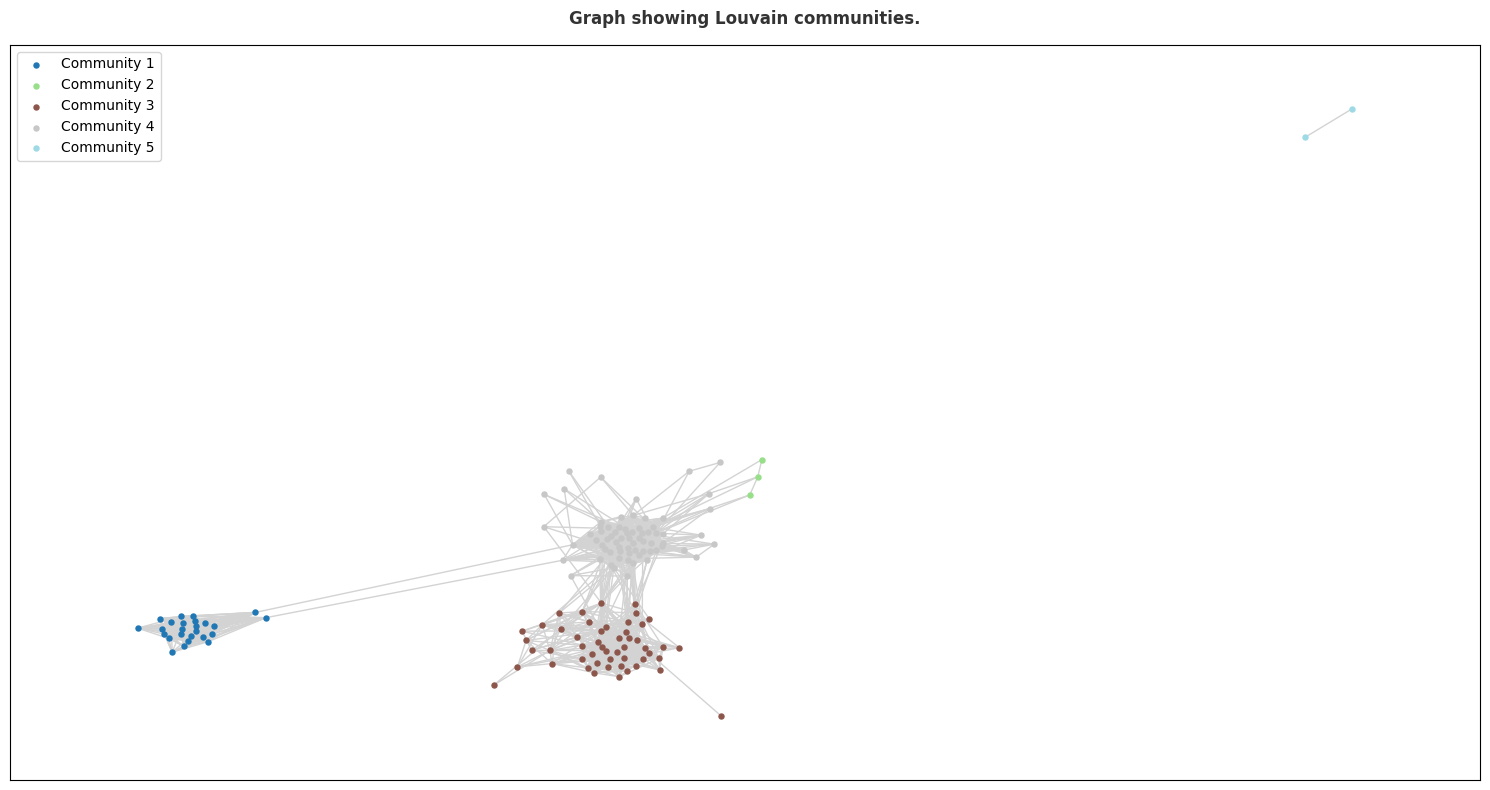

In [9]:
# Louvain algorithm for the Facebook Network
louvain_communities = nx_comm.louvain_communities(facebook_network, seed=12345)
plot_graph_communities(facebook_network, louvain_communities, "Louvain")

In [10]:
# Girvan Newman algorithm for Facebook Network
girvan_newman_communities_gen = nx_comm.girvan_newman(facebook_network)

# Since the algorithms returns communities down to the root level, I will choose the community with the higest modularity
modularities = []
best_modularity = -1
best_level = None

for community in girvan_newman_communities_gen:
    modularity = nx_comm.modularity(facebook_network, community)
    modularities.append(modularity)
    if modularity > best_modularity:
        best_modularity = modularity
        best_level = community
    else:
        pass


<ipython-input-8-246a40f0ad6b>:26: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)


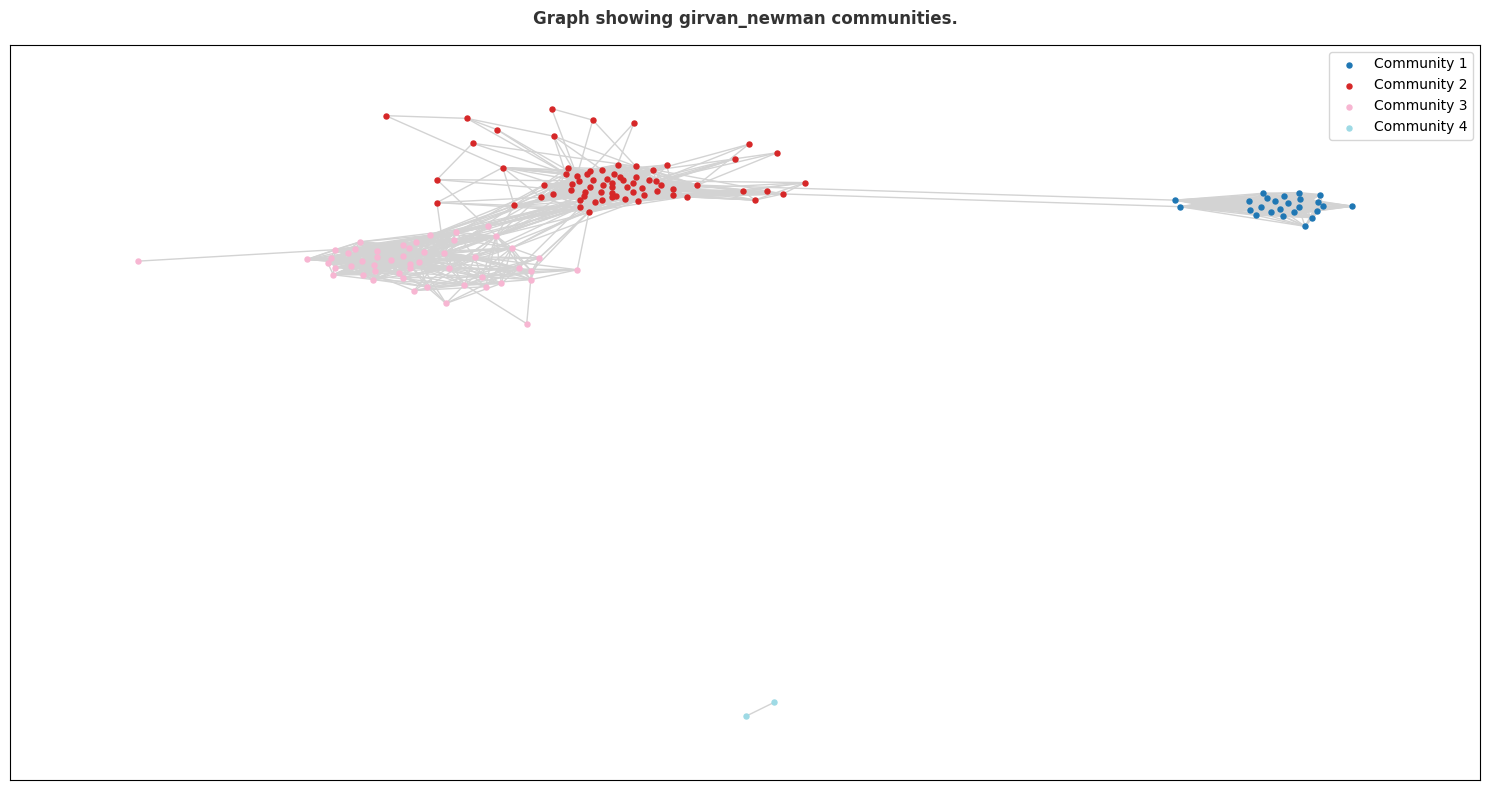

In [11]:
# Now that I have gotten the highest modularity and the resulting community, I will plot it
plot_graph_communities(facebook_network, best_level, "girvan_newman")

<ipython-input-8-246a40f0ad6b>:26: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)


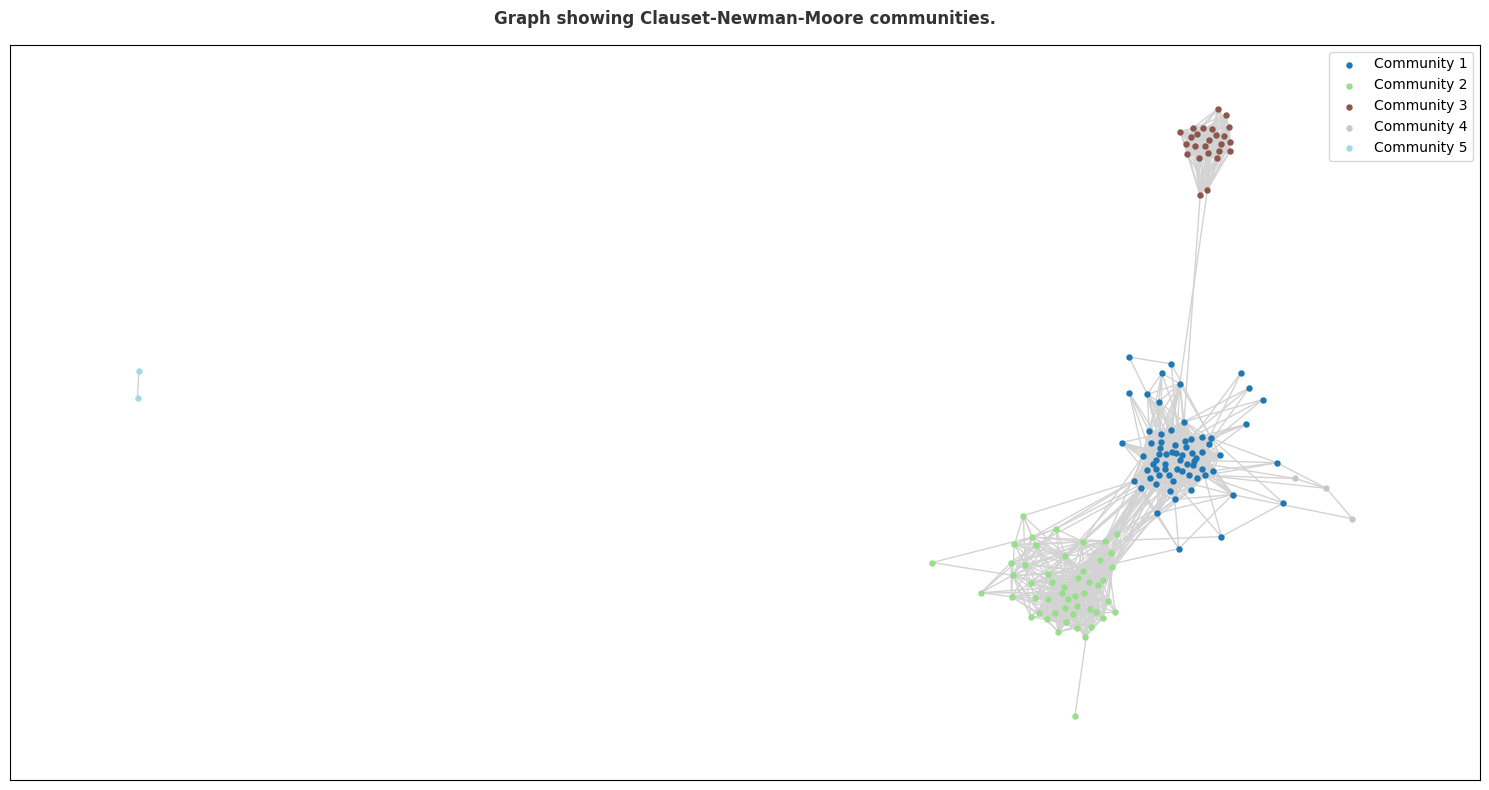

In [12]:
# Clauset-Newman-Moore community detection algorithm for Facebook Network
CNM_communities = nx_comm.greedy_modularity_communities(G=facebook_network)
plot_graph_communities(facebook_network, CNM_communities, "Clauset-Newman-Moore")

# (d) What are the differences between the community detection results shown in (c)? What are the possible reasons?


The plot clearly shows that the Louvain and Girvan-Newman algorithms provide similar results with only a tiny difference in their outputs. The sole difference between these two outputs is that the Louvain method has two communities in the centre, whereas the Girvan-Newman algorithm only has one community in the centre. In a Clauset-Newman scenario, however, the output is different.

# Possible Reasons:
Since the Louvain  and the Girvan-Newman algorithm reassigning nodes between communities, these two techniques optimise modularity because they are modularity oriented. In the case of Clauset-Newman  this algorithm is based on edge betweenness it removes the edge using betweenness scores. Due to this reason, it is less effective because it breaks the network into smaller parts.